In [1]:
import glob
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GroupShuffleSplit

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, cohen_kappa_score

In [6]:
'''
(1) Load features file
(1a) Test with single subject
'''

df_fea_path = "../outputs/local_df_fea/" 
all_fea_files = glob.glob(df_fea_path+'*.parquet') 

file = all_fea_files[0]
df = pd.read_parquet(file)

columns_names = ['subject_id', 'walk_or_not', 'fea_acc_x_mean', 'fea_acc_x_std', 'fea_acc_x_min', 'fea_acc_x_max', 
                                              'fea_acc_y_mean', 'fea_acc_y_std', 'fea_acc_y_min', 'fea_acc_y_max',
                                              'fea_acc_z_mean', 'fea_acc_z_std', 'fea_acc_z_min', 'fea_acc_z_max',
                                              'fea_smv_mean', 'fea_smv_std', 'fea_smv_min', 'fea_smv_max']
df_features = pd.DataFrame(columns=columns_names)

# Write feature values into dataframe
input_data = ['acc_x', 'acc_y', 'acc_z', 'smv']   # Input time series for computing features
features_types = ['mean', 'std', 'min', 'max']    # Features list to compute
features_names_for_df = ['fea_' + input_item + '_' + feature for input_item in input_data for feature in features_types]  # feature names used in a new dataframe 

for fea in features_names_for_df:
    df_features[fea] = df[fea].groupby(df['unique_id']).mean()
    df_features['walk_or_not'] = df['walk_or_not'].groupby(df['unique_id']).mean().astype(int)

df_features['subject_id'] = file.split('/')[-1].split('.')[0].split('_')[-1]
df_features

,subject_id,walk_or_not,fea_acc_x_mean,fea_acc_x_std,fea_acc_x_min,fea_acc_x_max,fea_acc_y_mean,fea_acc_y_std,fea_acc_y_min,fea_acc_y_max,fea_acc_z_mean,fea_acc_z_std,fea_acc_z_min,fea_acc_z_max,fea_smv_mean,fea_smv_std,fea_smv_min,fea_smv_max
unique_id,,,,,,,,,,,,,,,,,,
id650857ca_AnkleL_1_Walking_100_1,id650857ca,1,-0.019852,0.730573,-2.879,3.035,1.290123,0.564907,0.109,2.793,0.189156,0.435732,-1.836,1.352,1.507544,0.686020,0.403633,3.431575
id650857ca_AnkleL_1_Walking_101_1,id650857ca,1,-0.056424,0.767256,-2.746,3.172,1.294388,0.598138,0.039,3.113,0.212844,0.465830,-1.836,1.500,1.528842,0.741631,0.327590,3.654076
id650857ca_AnkleL_1_Walking_102_1,id650857ca,1,-0.005784,0.773203,-2.898,3.344,1.305374,0.583662,0.168,3.074,0.191872,0.474616,-1.867,1.539,1.538353,0.733544,0.314347,3.799887
id650857ca_AnkleL_1_Walking_103_1,id650857ca,1,0.019780,0.663885,-2.605,2.672,1.265867,0.522823,0.207,2.559,0.205454,0.386439,-1.773,1.414,1.444847,0.648739,0.339006,3.205613
id650857ca_AnkleL_1_Walking_113_1,id650857ca,1,-0.090737,0.760156,-2.730,2.824,1.304697,0.540374,0.129,2.754,0.284481,0.444658,-1.535,1.637,1.537908,0.702708,0.370127,3.462642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id650857ca_AnkleL_99_NonStudyAct_5_0,id650857ca,0,-0.032391,0.089340,-0.621,0.121,1.000762,0.021544,0.906,1.215,0.129080,0.066170,-0.242,0.445,1.015541,0.027141,0.915947,1.366296
id650857ca_AnkleL_99_NonStudyAct_6_0,id650857ca,0,-0.027396,0.043242,-0.230,0.008,1.006444,0.008114,0.965,1.035,0.107566,0.031488,0.047,0.313,1.013963,0.007594,0.996647,1.058533
id650857ca_AnkleL_99_NonStudyAct_7_0,id650857ca,0,-0.021233,0.072153,-0.605,0.121,1.000328,0.016494,0.898,1.137,0.137987,0.051130,-0.203,0.496,1.013750,0.023437,0.905139,1.288532


In [7]:
'''
(2b) Load all 27 subjects' feature values and save them to df_features_all
    Note: no need to run this step if the file "/outputs/df_features_all.parquet" exists
'''
columns_names = ['subject', 'walk_or_not', 'fea_acc_x_mean', 'fea_acc_x_std', 'fea_acc_x_min', 'fea_acc_x_max', 
                                              'fea_acc_y_mean', 'fea_acc_y_std', 'fea_acc_y_min', 'fea_acc_y_max',
                                              'fea_acc_z_mean', 'fea_acc_z_std', 'fea_acc_z_min', 'fea_acc_z_max',
                                              'fea_smv_mean', 'fea_smv_std', 'fea_smv_min', 'fea_smv_max']
df_features_all = pd.DataFrame(columns=columns_names)

# Load data
def load_features(df):
    df_features = pd.DataFrame(columns=columns_names)
    
    # Write feature values into dataframe
    input_data = ['acc_x', 'acc_y', 'acc_z', 'smv']   # Input time series for computing features
    features_types = ['mean', 'std', 'min', 'max']    # Features list to compute
    features_names_for_df = ['fea_' + input_item + '_' + feature for input_item in input_data for feature in features_types]  # feature names used in a new dataframe 
    
    for fea in features_names_for_df:
        df_features[fea] = df[fea].groupby(df['unique_id']).mean()
        df_features['walk_or_not'] = df['walk_or_not'].groupby(df['unique_id']).mean().astype(int)

    df_features['subject'] = file.split('/')[-1].split('.')[0].split('_')[-1]
    return df_features

df_fea_path = "../outputs/local_df_fea/" 
all_fea_files = glob.glob(df_fea_path+'*.parquet') 

for file in all_fea_files:
    df = pd.read_parquet(file)
    df_features = load_features(df)
    df_features_all = pd.concat([df_features_all, df_features])
    df_features_all.to_parquet('../outputs/df_features_all.parquet')

In [4]:
df = pd.read_parquet('../outputs/df_features_all.parquet')
df

,subject,walk_or_not,fea_acc_x_mean,fea_acc_x_std,fea_acc_x_min,fea_acc_x_max,fea_acc_y_mean,fea_acc_y_std,fea_acc_y_min,fea_acc_y_max,fea_acc_z_mean,fea_acc_z_std,fea_acc_z_min,fea_acc_z_max,fea_smv_mean,fea_smv_std,fea_smv_min,fea_smv_max
id650857ca_AnkleL_1_Walking_100_1,id650857ca,1,-0.019852,0.730573,-2.879,3.035,1.290123,0.564907,0.109,2.793,0.189156,0.435732,-1.836,1.352,1.507544,0.686020,0.403633,3.431575
id650857ca_AnkleL_1_Walking_101_1,id650857ca,1,-0.056424,0.767256,-2.746,3.172,1.294388,0.598138,0.039,3.113,0.212844,0.465830,-1.836,1.500,1.528842,0.741631,0.327590,3.654076
id650857ca_AnkleL_1_Walking_102_1,id650857ca,1,-0.005784,0.773203,-2.898,3.344,1.305374,0.583662,0.168,3.074,0.191872,0.474616,-1.867,1.539,1.538353,0.733544,0.314347,3.799887
id650857ca_AnkleL_1_Walking_103_1,id650857ca,1,0.019780,0.663885,-2.605,2.672,1.265867,0.522823,0.207,2.559,0.205454,0.386439,-1.773,1.414,1.444847,0.648739,0.339006,3.205613
id650857ca_AnkleL_1_Walking_113_1,id650857ca,1,-0.090737,0.760156,-2.730,2.824,1.304697,0.540374,0.129,2.754,0.284481,0.444658,-1.535,1.637,1.537908,0.702708,0.370127,3.462642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id4ea159a8_AnkleL_99_NonStudyAct_446_0,id4ea159a8,0,-0.018860,0.002994,-0.027,-0.008,0.967955,0.002152,0.961,0.977,0.299536,0.004303,0.285,0.313,1.013430,0.002287,1.004873,1.021271
id4ea159a8_AnkleL_99_NonStudyAct_4_0,id4ea159a8,0,0.002933,0.134332,-0.695,0.883,1.018882,0.120160,0.461,1.836,0.066226,0.085015,-0.348,0.508,1.034669,0.108105,0.660560,1.843803
id4ea159a8_AnkleL_99_NonStudyAct_5_0,id4ea159a8,0,-0.084093,0.312044,-2.035,2.461,1.053438,0.211162,0.348,1.945,0.046925,0.159660,-1.039,0.457,1.107489,0.244794,0.522536,2.675938
id4ea159a8_AnkleL_99_NonStudyAct_6_0,id4ea159a8,0,-0.027591,0.124832,-0.879,0.348,1.009905,0.031381,0.848,1.203,0.054584,0.052626,-0.215,0.234,1.020412,0.041794,0.912432,1.447661


In [4]:
'''
(2) Begin to split data for trainging and testing
(2a) Test with the train/test split function based on the subjects
'''
# Separate features (X) and target variable (y)
X = df.drop(columns=['subject', 'walk_or_not'])  # Features
y = df['walk_or_not']                            # Target variable

# GroupShuffleSplit based on the subject column
gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Split data into training and testing sets
for train_idx, test_idx in gss.split(X, y, groups=df['subject']):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# Print the shape of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9253, 16)
X_test shape: (4477, 16)
y_train shape: (9253,)
y_test shape: (4477,)


In [5]:
X_train

,fea_acc_x_mean,fea_acc_x_std,fea_acc_x_min,fea_acc_x_max,fea_acc_y_mean,fea_acc_y_std,fea_acc_y_min,fea_acc_y_max,fea_acc_z_mean,fea_acc_z_std,fea_acc_z_min,fea_acc_z_max,fea_smv_mean,fea_smv_std,fea_smv_min,fea_smv_max
id650857ca_AnkleL_1_Walking_100_1,-0.019852,0.730573,-2.879,3.035,1.290123,0.564907,0.109,2.793,0.189156,0.435732,-1.836,1.352,1.507544,0.686020,0.403633,3.431575
id650857ca_AnkleL_1_Walking_101_1,-0.056424,0.767256,-2.746,3.172,1.294388,0.598138,0.039,3.113,0.212844,0.465830,-1.836,1.500,1.528842,0.741631,0.327590,3.654076
id650857ca_AnkleL_1_Walking_102_1,-0.005784,0.773203,-2.898,3.344,1.305374,0.583662,0.168,3.074,0.191872,0.474616,-1.867,1.539,1.538353,0.733544,0.314347,3.799887
id650857ca_AnkleL_1_Walking_103_1,0.019780,0.663885,-2.605,2.672,1.265867,0.522823,0.207,2.559,0.205454,0.386439,-1.773,1.414,1.444847,0.648739,0.339006,3.205613
id650857ca_AnkleL_1_Walking_113_1,-0.090737,0.760156,-2.730,2.824,1.304697,0.540374,0.129,2.754,0.284481,0.444658,-1.535,1.637,1.537908,0.702708,0.370127,3.462642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id4ea159a8_AnkleL_99_NonStudyAct_446_0,-0.018860,0.002994,-0.027,-0.008,0.967955,0.002152,0.961,0.977,0.299536,0.004303,0.285,0.313,1.013430,0.002287,1.004873,1.021271
id4ea159a8_AnkleL_99_NonStudyAct_4_0,0.002933,0.134332,-0.695,0.883,1.018882,0.120160,0.461,1.836,0.066226,0.085015,-0.348,0.508,1.034669,0.108105,0.660560,1.843803
id4ea159a8_AnkleL_99_NonStudyAct_5_0,-0.084093,0.312044,-2.035,2.461,1.053438,0.211162,0.348,1.945,0.046925,0.159660,-1.039,0.457,1.107489,0.244794,0.522536,2.675938
id4ea159a8_AnkleL_99_NonStudyAct_6_0,-0.027591,0.124832,-0.879,0.348,1.009905,0.031381,0.848,1.203,0.054584,0.052626,-0.215,0.234,1.020412,0.041794,0.912432,1.447661


In [6]:
y_train

id650857ca_AnkleL_1_Walking_100_1         1
id650857ca_AnkleL_1_Walking_101_1         1
id650857ca_AnkleL_1_Walking_102_1         1
id650857ca_AnkleL_1_Walking_103_1         1
id650857ca_AnkleL_1_Walking_113_1         1
                                         ..
id4ea159a8_AnkleL_99_NonStudyAct_446_0    0
id4ea159a8_AnkleL_99_NonStudyAct_4_0      0
id4ea159a8_AnkleL_99_NonStudyAct_5_0      0
id4ea159a8_AnkleL_99_NonStudyAct_6_0      0
id4ea159a8_AnkleL_99_NonStudyAct_7_0      0
Name: walk_or_not, Length: 9253, dtype: int64

Created Logistic Regression model
AUC =  0.9399377577072727
F1 =  0.7229156265601597
Accuracy =  0.8760330578512396
Recall =  0.8162344983089064
Specificity =  0.8908077994428969
Precision =  0.6487455197132617


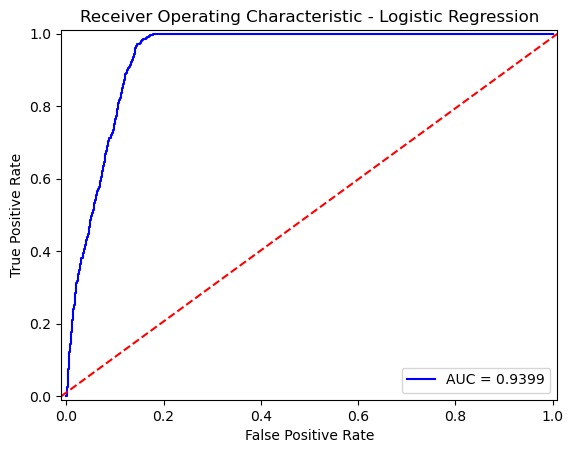

In [6]:
df = pd.read_parquet('../outputs/df_features_all.parquet')
model_used = 'LR'
run_modeling(df, model_used)

print_scores(model_used)

Created Raandpom Forest model
AUC =  0.9351675234664748
F1 =  0.7260049220672682
Accuracy =  0.8507929417020326
Recall =  0.9977452085682075
Specificity =  0.8144846796657381
Precision =  0.5705996131528046


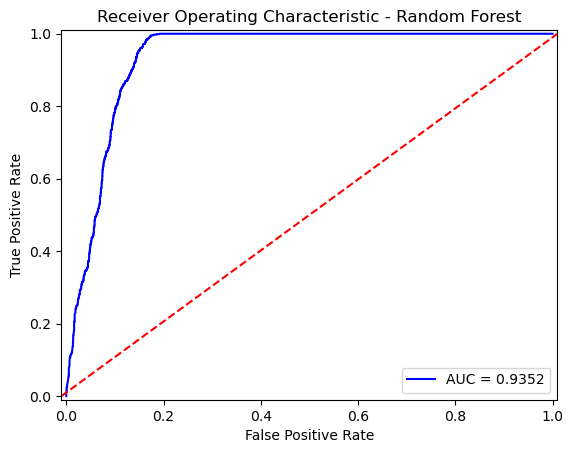

In [7]:
df = pd.read_parquet('../outputs/df_features_all.parquet')
model_used = 'RF'
run_modeling(df, model_used)

print_scores(model_used)

AUC =  0.941082425502382
F1 =  0.6950276243093922
Accuracy =  0.8767031494304222
Recall =  0.7091319052987599
Specificity =  0.9181058495821727
Precision =  0.6814734561213435


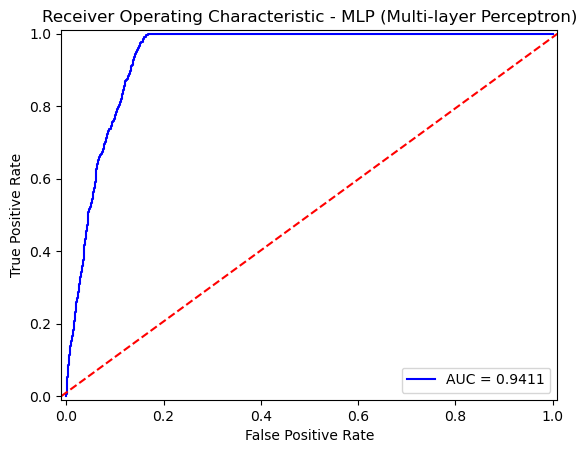

In [8]:
df = pd.read_parquet('../outputs/df_features_all.parquet')
model_used = 'MLP'
run_modeling(df, model_used)

print_scores(model_used)

In [ ]:
# model_used = 'XGB'
# run_modeling(df, model_used)

# print_scores(model_used)

In [2]:
def run_modeling(df, model_used):
    # Split train/test
    X_train, y_train, X_test, y_test = data_split(df)
    
    # Create model
    model = create_model(X_train, y_train, model_used)
    
    # Run Logistic Regression
    outputs = predict_results(X_test, y_test, model)
    
    # Plot ROC Curve
    plot_roc_curve(outputs['auc'], outputs['fpr'], outputs['tpr'], model_used)
    
    # save outputs to pickle file
    if model_used=='LR':
        outputs_path = '../outputs/LR_outputs/test.pkl'
    elif model_used=='RF':
        outputs_path = '../outputs/RF_outputs/test.pkl'
    elif model_used=='XGB':
        outputs_path = '../outputs/XGB_outputs/test.pkl'
    elif model_used=='SVM':
        outputs_path = '../outputs/SVM_outputs/test.pkl'
    elif model_used=='MLP':
        outputs_path = '../outputs/MLP_outputs/test.pkl'
        
    with open(outputs_path, 'wb') as f:
        pickle.dump(outputs, f)
    #     # Getting back the objects:
    #     with open('figs_RF_ROC/RF_outputs_13.pkl', 'rb') as f:
    #         RF_outputs = pickle.load(f)


def data_split(df):
    # Separate features (X) and target variable (y)
    X = df.drop(columns=['subject', 'walk_or_not'])  # Features
    y = df['walk_or_not']                            # Target variable
    
    # GroupShuffleSplit based on the subject column
    gss = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
    
    # Split data into training and testing sets
    for train_idx, test_idx in gss.split(X, y, groups=df['subject']):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    return X_train, y_train, X_test, y_test

def create_model(X_train, y_train, model_used):
    if model_used=='LR':
        model = LogisticRegression(penalty='l1', solver='liblinear', verbose=0, multi_class='auto')
        print('Created Logistic Regression model')
    elif model_used=='RF':
        model = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=3, min_samples_split=10, min_samples_leaf=32, bootstrap=True, random_state=16, class_weight = "balanced")
        print('Created Raandpom Forest model')
    elif model_used=='XGB':
        model = xgb.XGBClassifier(objective='binary:logistic')
    elif model_used=='SVM':
        model = SVC(kernel='linear', C=1.0, random_state=42) # Create a Support Vector Classifier (SVC) model
    elif model_used=='MLP':
        # model = MLPClassifier(solver='lbfgs', alpha=1e-50, hidden_layer_sizes=(5, 2), random_state=1)
        model = MLPClassifier(random_state=1, max_iter=300)
        
    model.fit(X_train, y_train)
    return model


def predict_results(X_test, y_test, model):
    y_probas = model.predict_proba(X_test)
    preds = y_probas[:,1] # output prediction for sleep (second column)
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    auc = metrics.auc(fpr, tpr)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    
    outputs = {
                        'auc': auc,
                        'tpr': tpr,
                        'fpr': fpr,
                        'accuracy': accuracy,
                        'f1': f1,
                        'precision': precision,
                        'recall': recall,
                        'kappa': kappa,
                        'specificity': specificity
                        }
    return outputs


def print_scores(model_used):
    if model_used == 'LR':
        with open('../outputs/LR_outputs/test.pkl', 'rb') as f:
            outputs = pickle.load(f)
    elif model_used == 'RF':
        with open('../outputs/RF_outputs/test.pkl', 'rb') as f:
            outputs = pickle.load(f)
    elif model_used == 'XGB':
        with open('../outputs/XGB_outputs/test.pkl', 'rb') as f:
            outputs = pickle.load(f)
    elif model_used == 'SVM':
        with open('../outputs/SVM_outputs/test.pkl', 'rb') as f:
            outputs = pickle.load(f)
    elif model_used == 'MLP':
        with open('../outputs/MLP_outputs/test.pkl', 'rb') as f:
            outputs = pickle.load(f)
    
    print('AUC = ', outputs['auc'])
    print('F1 = ', outputs['f1'])
    print('Accuracy = ', outputs['accuracy'])
    print('Recall = ', outputs['recall'])
    print('Specificity = ', outputs['specificity'])
    print('Precision = ', outputs['precision'])
    

def plot_roc_curve(auc, fpr, tpr, model_used):
    # https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
    
    # Plot ROC Curve
    if model_used == 'LR':
        plt.title('Receiver Operating Characteristic - Logistic Regression')
    elif model_used == 'RF':
        plt.title('Receiver Operating Characteristic - Random Forest')
    elif model_used=='XGB':
        plt.title('Receiver Operating Characteristic - XGBoost')
    elif model_used=='SVM':    
        plt.title('Receiver Operating Characteristic - Support Vector Classifier or SVM')
    elif model_used=='MLP':    
        plt.title('Receiver Operating Characteristic - MLP (Multi-layer Perceptron)')
        
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([-0.01, 1.01], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    if model_used == 'LR':
        plt.savefig('../outputs/LR_outputs/test.jpg', dpi=600, bbox_inches = "tight")
    elif model_used == 'RF':
        plt.savefig('../outputs/RF_outputs/test.jpg', dpi=600, bbox_inches = "tight")
    elif model_used=='XGB':
        plt.savefig('../outputs/XGB_outputs/test.jpg', dpi=600, bbox_inches = "tight")
    elif model_used=='SVM':
        plt.savefig('../outputs/SVM_outputs/test.jpg', dpi=600, bbox_inches = "tight")
    elif model_used=='MLP':
        plt.savefig('../outputs/MLP_outputs/test.jpg', dpi=600, bbox_inches = "tight")        
    # plt.close(fig='all')